# Adj matrices from Dalin Zhang.

In [1]:
from graph_utils import compute_adj_matrices, get_sensor_pos
import seaborn as sns
import networkx as nx
import mne
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
fname = os.path.join('dataset/physionet.org/files/eegmmidb/1.0.0/S001/S001R01.edf')
raw = mne.io.read_raw_edf(fname, preload=True, verbose=False)
mne.datasets.eegbci.standardize(raw)  # set channel names
montage = mne.channels.make_standard_montage('standard_1005')
raw.set_montage(montage)

montage = raw.get_montage()
picks = mne.pick_types(raw.info, meg=False, eeg=True, stim=False, eog=False, exclude='bads')

pos = mne.viz.topomap._find_topomap_coords(raw.info, picks)

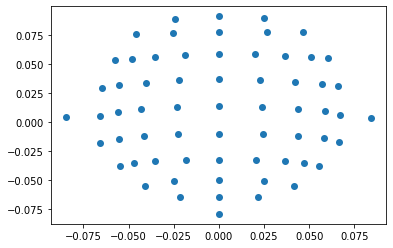

In [3]:
plt.scatter(pos[:, 0], pos[:, 1], picker=True, clip_on=False, s=25, lw=2)
plt.show()

In [18]:
n_adj = compute_adj_matrices('n')
d_adj = compute_adj_matrices('d')
s_adj = compute_adj_matrices('s')

In [19]:
n_G = nx.from_numpy_array(n_adj)
d_G = nx.from_numpy_array(d_adj)
s_G = nx.from_numpy_array(s_adj)

In [20]:
ch_map = {i: raw.ch_names[i] for i in range(len(raw.ch_names))}

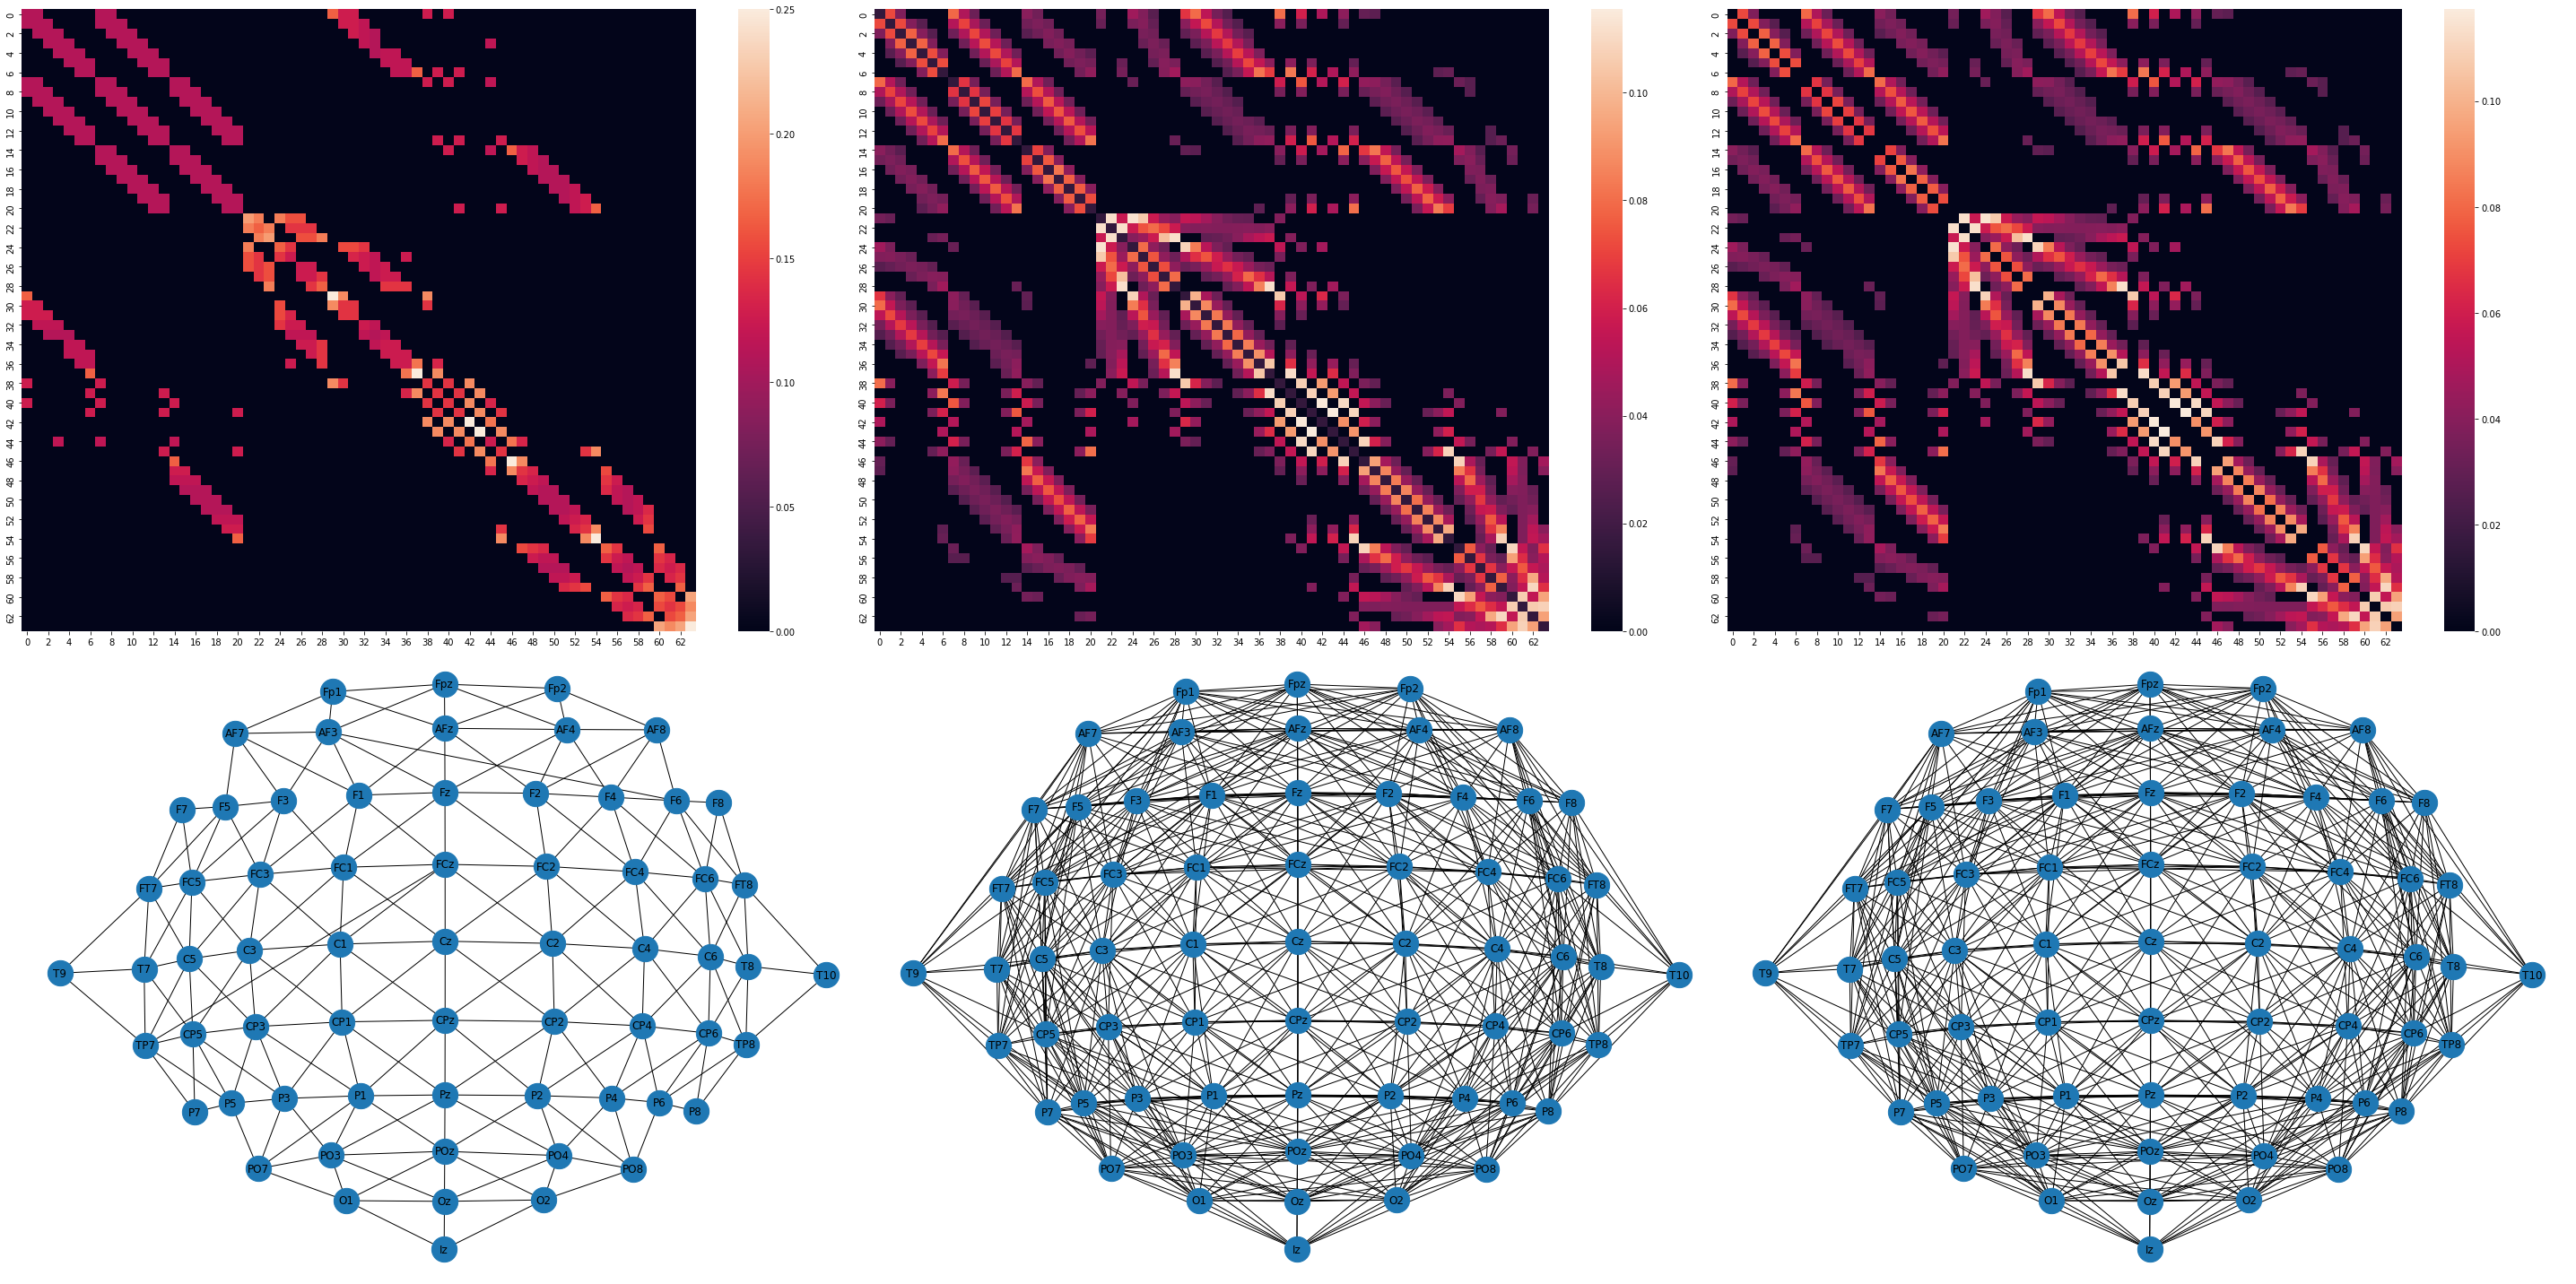

In [30]:
fig, axs = plt.subplots(2, 3, figsize=(40, 20))
sns.heatmap(n_adj, ax=axs[0][0])
sns.heatmap(d_adj, ax=axs[0][1])
sns.heatmap(s_adj, ax=axs[0][2])
nx.draw(n_G, pos=pos, with_labels=True, labels=ch_map, node_size=800, ax=axs[1][0])
nx.draw(d_G, pos=pos, with_labels=True, labels=ch_map, node_size=800, ax=axs[1][1])
nx.draw(s_G, pos=pos, with_labels=True, labels=ch_map, node_size=800, ax=axs[1][2])
plt.tight_layout()
plt.savefig('./images/prevwork_adjs')
plt.show()

In [ ]:
import pickle
import seaborn as sns

In [ ]:
asdf = pickle.load(open('output/node_embedding.pickle', 'rb'))

In [ ]:
asdf.shape

(64, 64)

<AxesSubplot:>

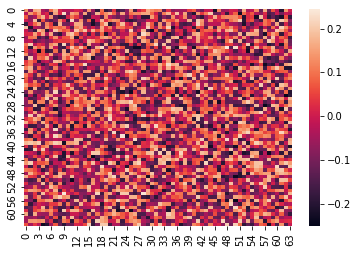

In [ ]:
sns.heatmap(asdf)

<AxesSubplot:>

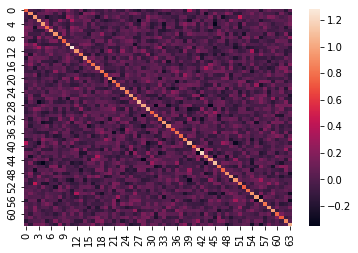

In [ ]:
A = asdf.dot(asdf.T)
sns.heatmap(A)

In [ ]:
import numpy as np
np.where(A > 0.6, 1, 0)

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 1]])

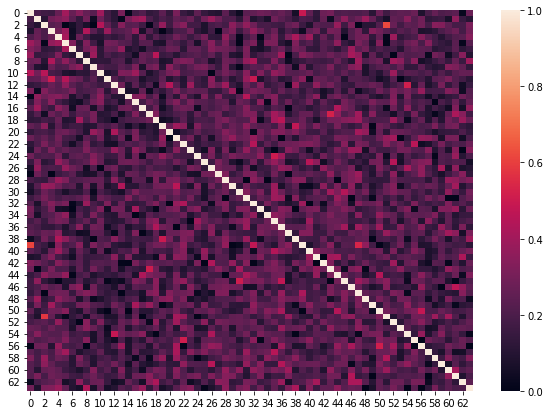

In [ ]:
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

scaler = MinMaxScaler()

A = scaler.fit_transform(A)
plt.figure(figsize=(10, 7))
sns.heatmap(A)
plt.savefig('./output/A.png')
plt.show()

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

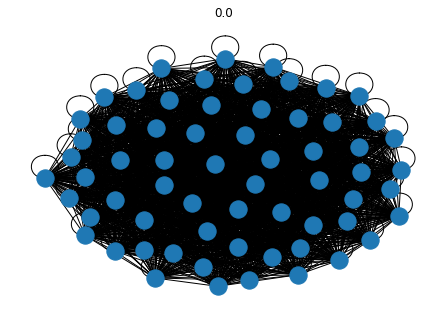

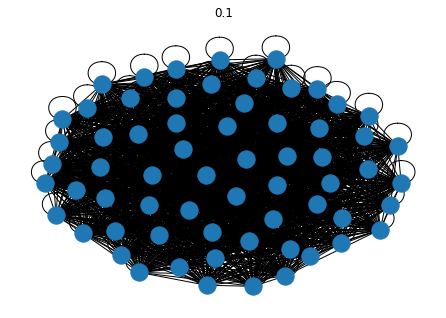

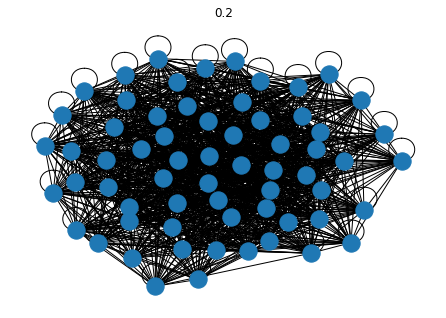

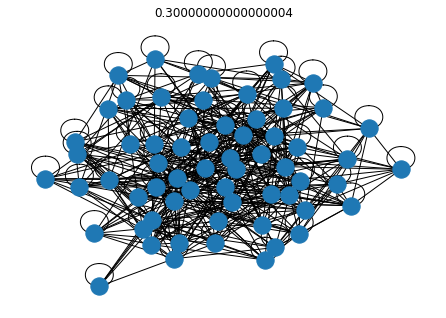

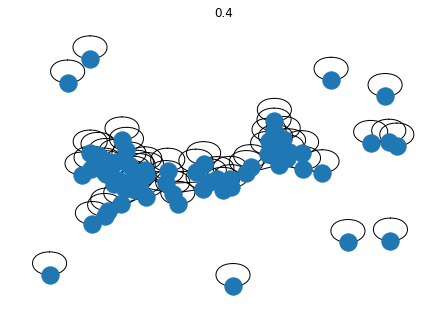

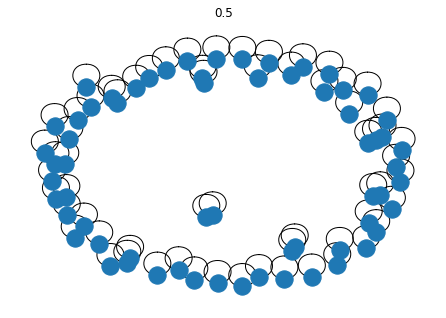

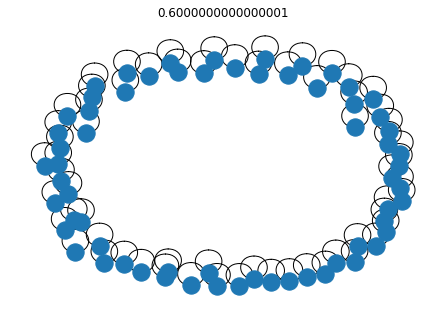

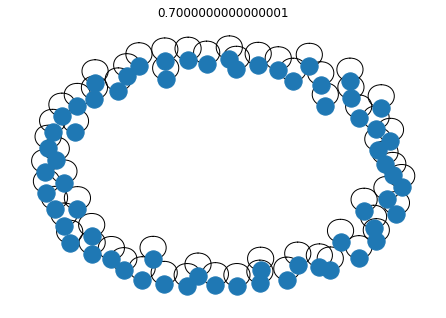

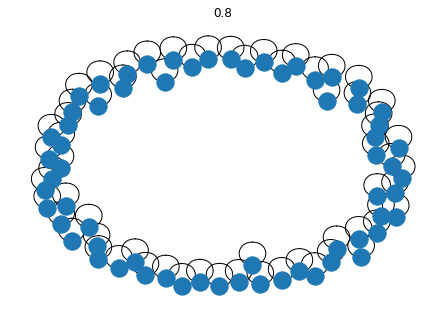

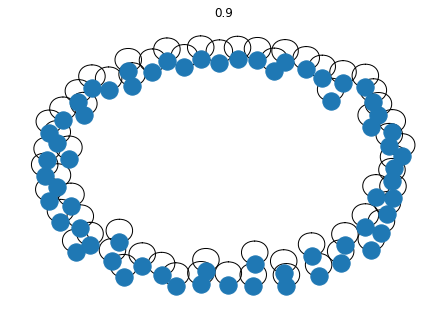

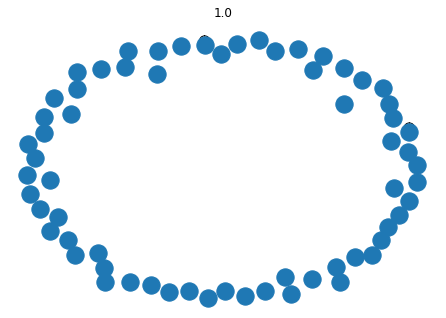

In [ ]:
j = 0
for i in np.arange(0, 1.1, 0.1):
    temp = np.where(A > i, 1, 0)
    G = nx.from_numpy_matrix(temp)
    nx.draw(G)
    plt.title(i)
    plt.show()

In [ ]:
import pandas as pd
channel_names = pd.read_csv('dataset/physionet.org_csv_full_imagine/S001_imagine.csv')
channel_names = channel_names.columns[3:].values
idc = [i for i in range(len(channel_names))]
channel_names = {idc[i]: channel_names[i] for i in range(len(channel_names))}

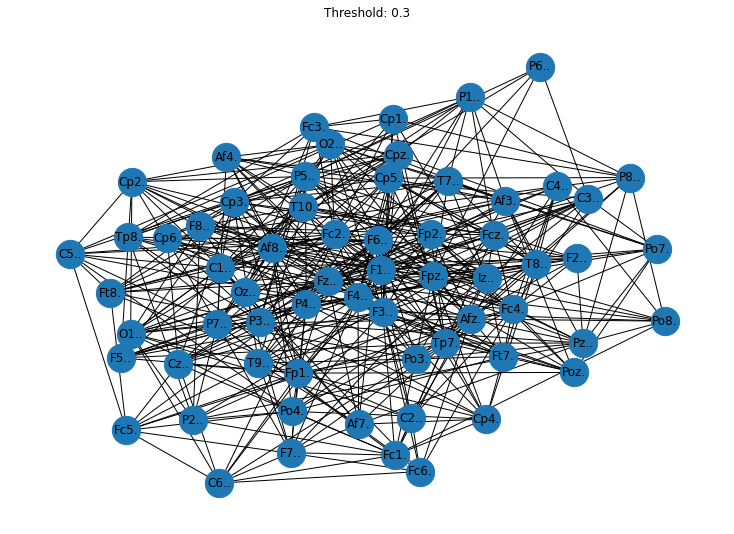

In [ ]:
plt.figure(figsize=(10, 7))
temp = np.where(A > 0.3, 1, 0)
np.fill_diagonal(temp, 0)
G = nx.from_numpy_matrix(temp)
pos = nx.spring_layout(G, k=0.5)
nx.draw(G, pos, labels=channel_names, with_labels=True, node_size=800)
plt.title('Threshold: 0.3')
plt.savefig('./output/A1.png')
plt.show()

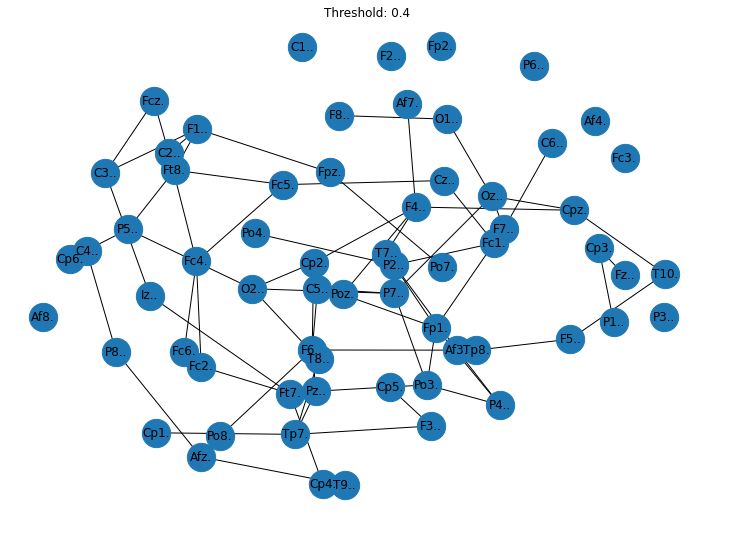

In [ ]:
plt.figure(figsize=(10, 7))
temp = np.where(A > 0.4, 1, 0)
np.fill_diagonal(temp, 0)
G = nx.from_numpy_matrix(temp)
pos = nx.spring_layout(G, k=0.5)
nx.draw(G, pos, labels=channel_names, with_labels=True, node_size=800)
plt.title('Threshold: 0.4')
plt.savefig('./output/A2.png')
plt.show()

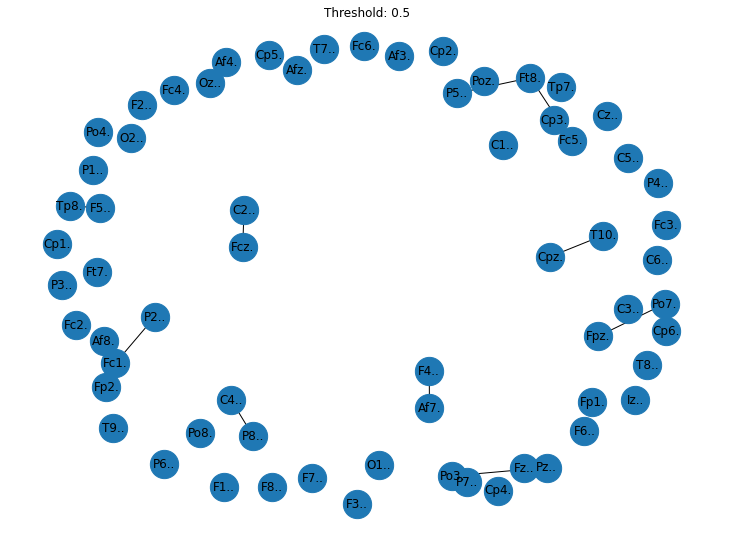

In [ ]:
plt.figure(figsize=(10, 7))
temp = np.where(A > 0.5, 1, 0)
np.fill_diagonal(temp, 0)
G = nx.from_numpy_matrix(temp)
pos = nx.spring_layout(G, k=0.5)
nx.draw(G, pos, labels=channel_names, with_labels=True, node_size=800)
plt.title('Threshold: 0.5')
plt.savefig('./output/A2.png')
plt.show()